# Hồi quy Softmax

Hồi quy Softmax (hay Multinomial Logistic Regression, tức _Hồi quy logistic đa lớp_) là mô hình học có giám sát được sử dụng để xử lý các bài toán phân loại nhiều hơn 2 lớp.

Giả sử có một bộ dữ liệu $\mathcal{D}$ gồm $N$ mẫu và mỗi mẫu dữ liệu $(\mathbf{x}_i,y_i)$ bao gồm vector thể hiện cho $d$ đặc trưng $\mathbf{x}_i \in \mathbb{R}^d$ và một nhãn $y_i \in \{1,2,\ldots,K\}$ với $K$ là số lượng lớp. Mô hình Softmax dự đoán xác suất của một mẫu thuộc về lớp $k$ thông qua công thức:
\begin{align*}
P\left(y=k|\mathbf{x};\mathbf{W}\right) = \frac{e^{\mathbf{w}^T_k \mathbf{x}}}{\sum_{j=1}^K e^{\mathbf{w}^T_j \mathbf{x}}}
\end{align*}

Trong công thức này, $\mathbf{W} = [\mathbf{w}_1,\mathbf{w}_2,\ldots,\mathbf{w}_K] \in \mathbb{R}^{d\times K}$ là ma trận trọng số cần học và $\mathbf{w}_k \in \mathbb{R}^d$ là vector trọng số cho lớp $k$.

Hàm mất mát thường sử dụng có dạng cross - entropy, được định nghĩa như sau:
\begin{align*}
\mathcal{L}(\mathbf{W}) = - \frac{1}{N} \sum_{i=1}^N \sum_{k=1}^K 1(y_i=k) \ln P\left(y_i=k|\mathbf{x}_i;\mathbf{W}\right)
\end{align*}

Với $1(y_i=k)$ là hàm chỉ thị, bằng $1$ nếu $y_i = k$ đúng và bằng $0$ nếu $y_i \neq k$.

Ta sẽ mã hóa $y_i$ bởi một vector $\mathbf{y}_i = (y_{1i},y_{2i},\ldots,y_{Ki})^T \in \mathbb{R}^K$ có $y_{ki}=1$ nếu $y_i = k$ và $y_{ji}=0$ với mọi $j \neq k$. Đồng thời, đặt $a_{ki} = P\left(y_i=k|\mathbf{x}_i;\mathbf{W}\right)$ là xác suất dự đoán mẫu dữ liệu thứ $i$ rơi vào lớp $k$. Ta thu được ma trận dữ liệu thực tế $X=[\mathbf{x}_1,\mathbf{x}_2,\ldots,\mathbf{x}_N] \in \mathbb{R}^{d\times N}$, $Y = [y_{ki}] \in \mathbb{R}^{K\times N}$ và ma trận dự đoán $A = [a_{ki}] \in \mathbb{R}^{K\times N}$. Khi ấy ta có thể viết lại:
\begin{align*}
\mathcal{L}(\mathbf{W}) = - \frac{1}{N} \sum_{i=1}^N \sum_{k=1}^K y_{ki} \ln(a_{ki})
\end{align*}

Với chỉ một điểm dữ liệu $(\mathbf{x}_i,y_i)$ ta có:
\begin{align*}
\mathcal{L}_i(\mathbf{W}) = - \sum_{k=1}^K y_{ki} \ln(a_{ki}) = - \sum_{k=1}^K y_{ki} \ln\left(\frac{e^{\mathbf{w}^T_k \mathbf{x}_i}}{\sum_{j=1}^K e^{\mathbf{w}^T_j \mathbf{x_i}}}\right) = - \sum_{k=1}^K \left[y_{ki}\mathbf{w}^T_k \mathbf{x}_i-y_{ki}\ln\left(\sum_{j=1}^K e^{\mathbf{w}^T_j \mathbf{x}_i}\right)\right]
\end{align*}

Lưu ý, ta có tổng xác suất $\sum_{k=1}^K y_{ki} = 1$ nên viết lại thành:
\begin{align*}
\mathcal{L}_i(\mathbf{W}) = - \sum_{k=1}^K y_{ki} \ln(a_{ki}) = - \sum_{k=1}^K y_{ki} \ln\left(\frac{e^{\mathbf{w}^T_k \mathbf{x}_i}}{\sum_{j=1}^K e^{\mathbf{w}^T_j \mathbf{x_i}}}\right) = - \left(\sum_{k=1}^K y_{ki}\mathbf{w}^T_k \mathbf{x}_i\right)+\ln\left(\sum_{j=1}^K e^{\mathbf{w}^T_j \mathbf{x}_i}\right)
\end{align*}

Lấy đạo hàm riêng theo vector $\mathbf{w}_k$ ta có:
\begin{align*}
\frac{\partial \mathcal{L}_i(\mathbf{W})}{\partial \mathbf{w}_k} = -y_{ki}\mathbf{x}_i+\frac{e^{\mathbf{w}^T_k \mathbf{x}_i}}{\sum_{j=1}^K e^{\mathbf{w}^T_j \mathbf{x}_i}}\mathbf{x}_i = (a_{ki}-y_{ki})\mathbf{x}_i = e_{ki}\mathbf{x}_i
\end{align*}

Với $e_{ki}=a_{ki}-y_{ki}$ là sai số (số thực). Thế thì:
\begin{align*}
\frac{\partial \mathcal{L}_i(\mathbf{W})}{\partial \mathbf{W}} = \left[\frac{\partial \mathcal{L}_i(\mathbf{W})}{\partial \mathbf{w}_1},\frac{\partial \mathcal{L}_i(\mathbf{W})}{\partial \mathbf{w}_2},\ldots,\frac{\partial \mathcal{L}_i(\mathbf{W})}{\partial \mathbf{w}_K}\right]=(e_{1i},e_{2i},\ldots,e_{Ki})\mathbf{x}_i = \mathbf{x}_ie_i^T
\end{align*}

Vậy gradient của $\mathcal{L}(\mathbf{w})$ theo ma trận $\mathbf{W}$ là:
\begin{align*}
\frac{\partial \mathcal{L}(\mathbf{W})}{\partial \mathbf{W}} = XE^T = X(A-Y)^T
\end{align*}

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
def softmax(z):
    e_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return e_z / np.sum(e_z, axis=1, keepdims=True)

def cross_entropy_loss(y_true, y_pred):
    N = y_true.shape[0]  # Number of samples
    log_likelihood = -np.log(y_pred[np.arange(N), y_true.argmax(axis=1)])
    loss = np.sum(log_likelihood) / N
    return loss

def predict(W, b, X):
    Z = np.dot(X, W.T) + b
    return softmax(Z)

def compute_accuracy(y_true, y_pred):
    # Convert one-hot encoded predictions and labels to integers
    y_true_classes = np.argmax(y_true, axis=1)
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    # Compute accuracy
    accuracy = np.mean(y_true_classes == y_pred_classes)
    return accuracy

In [3]:
def softmax_regression_nn(X, y, epochs, lr):
    input_size = X.shape[1]
    output_size = y.shape[1]
    
    # Initialize weights and bias
    W = np.random.randn(output_size, input_size)
    b = np.zeros((output_size,))
    
    for epoch in range(epochs):
        # Forward propagation
        Z = np.dot(X, W.T) + b
        A = softmax(Z)
        
        # Loss computation
        loss = cross_entropy_loss(y, A)
        
        # Backward propagation
        dZ = A - y
        dW = np.dot(dZ.T, X) / X.shape[0]
        db = np.sum(dZ, axis=0) / X.shape[0]
        
        # Update weights and bias
        W = W - lr * dW
        b = b - lr * db
        
        # Compute and print loss and accuracy every 100 epochs
        if epoch % 100 == 0:
            accuracy = compute_accuracy(y, A)
            print(f"Epoch {epoch}, Loss: {loss}, Accuracy: {accuracy * 100:.2f}%")
    
    return W, b

In [4]:
data = pd.read_csv("C:\\Users\\admin\\Downloads\\winequality-red.csv")
data_head = data.head()

print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

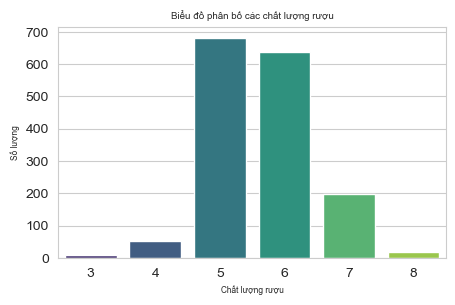

In [5]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a histogram for the 'quality' column
plt.figure(figsize=(5, 3))
sns.countplot(x='quality', data=data, palette='viridis')

# Title and labels
plt.title('Biểu đồ phân bố các chất lượng rượu', fontsize=7)
plt.xlabel('Chất lượng rượu', fontsize=6)
plt.ylabel('Số lượng', fontsize=6)

# Display the plot
plt.show()

In [12]:
# Chia thuộc tính và nhãn
X = data.drop("quality", axis=1).values
y = data["quality"].values

# Chia tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()

# Chuẩn hóa dữ liệu
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Mã hóa y dưới dạng vector 6 chiều
encoder = OneHotEncoder(sparse_output=False)
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.reshape(-1, 1))

In [8]:
W, b = softmax_regression_nn(X_train_scaled, y_train_encoded, epochs=1000, lr=0.2)

Epoch 0, Loss: 5.0457379531772935, Accuracy: 24.39%
Epoch 100, Loss: 1.0597156572338886, Accuracy: 59.66%
Epoch 200, Loss: 0.9742876732770732, Accuracy: 60.59%
Epoch 300, Loss: 0.9559112371100955, Accuracy: 60.67%
Epoch 400, Loss: 0.9463576141877467, Accuracy: 60.28%
Epoch 500, Loss: 0.9398986081537, Accuracy: 60.75%
Epoch 600, Loss: 0.9352094887509005, Accuracy: 60.91%
Epoch 700, Loss: 0.9316916382983519, Accuracy: 61.14%
Epoch 800, Loss: 0.9289859741758743, Accuracy: 61.14%
Epoch 900, Loss: 0.9268570839243896, Accuracy: 61.06%


In [14]:
print(y_train_encoded.shape)
print(X_train_scaled.shape)

(1279, 6)
(1279, 11)
